In [1]:
pip install pymoo

     ---------------------------------------- 0.0/68.4 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/68.4 kB ? eta -:--:--
     ----------------- -------------------- 30.7/68.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 68.4/68.4 kB 625.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/207.3 kB ? eta -:--:--
     --------------- ----------------------- 81.9/207.3 kB 4.8 MB/s eta 0:00:01
     ------------------------------- ------ 174.1/207.3 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 207.3/207.3 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/989.7 kB ? eta -:--:--
   --------- ------------------------------ 225.3/989.7 kB 6.9 MB/s eta 0:00:01
   ---------------- ----------------------- 409.6/989.7 kB 4.2 MB/s eta 0:00:01
   ------------------ --------------------- 450.6

In [1]:
import pymoo
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
import matplotlib.pyplot as plt
from pymoo.indicators.hv import Hypervolume

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [57]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
a=df.drop(['age','anaemia','diabetes','ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT'], axis = 'columns')
a

,creatinine_phosphokinase,platelets
0,582,265000.00
1,7861,263358.03
2,146,162000.00
3,111,210000.00
4,160,327000.00
...,...,...
294,61,155000.00
295,1820,270000.00
296,2060,742000.00
297,2413,140000.00


In [5]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
a = mms.fit_transform(a)
a = pd.DataFrame(a)
a

,0,1
0,0.071319,0.290823
1,1.000000,0.288833
2,0.015693,0.165960
3,0.011227,0.224148
4,0.017479,0.365984
...,...,...
294,0.004848,0.157474
295,0.229268,0.296884
296,0.259888,0.869075
297,0.304925,0.139290


In [6]:
df=df.drop(['creatinine_phosphokinase', 'platelets'], axis = 'columns')
a.columns =['creatinine_phosphokinase', 'platelets']
a

,creatinine_phosphokinase,platelets
0,0.071319,0.290823
1,1.000000,0.288833
2,0.015693,0.165960
3,0.011227,0.224148
4,0.017479,0.365984
...,...,...
294,0.004848,0.157474
295,0.229268,0.296884
296,0.259888,0.869075
297,0.304925,0.139290


In [7]:
df1 = pd.concat([df, a], axis=1)
df1

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,creatinine_phosphokinase,platelets
0,75.0,0,0,20,1,1.9,130,1,0,4,1,0.071319,0.290823
1,55.0,0,0,38,0,1.1,136,1,0,6,1,1.000000,0.288833
2,65.0,0,0,20,0,1.3,129,1,1,7,1,0.015693,0.165960
3,50.0,1,0,20,0,1.9,137,1,0,7,1,0.011227,0.224148
4,65.0,1,1,20,0,2.7,116,0,0,8,1,0.017479,0.365984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,38,1,1.1,143,1,1,270,0,0.004848,0.157474
295,55.0,0,0,38,0,1.2,139,0,0,271,0,0.229268,0.296884
296,45.0,0,1,60,0,0.8,138,0,0,278,0,0.259888,0.869075
297,45.0,0,0,38,0,1.4,140,1,1,280,0,0.304925,0.139290


In [3]:
x=df.drop(['DEATH_EVENT'], axis = 'columns')
y=df['DEATH_EVENT']

In [4]:
#!pip install -U imbalanced-learn
from imblearn.combine import SMOTETomek
sm = SMOTETomek()
x_sm, y_sm = sm.fit_resample(x, y)

In [5]:
from collections import Counter
print(sorted(Counter(y_sm).items()))

[(0, 158), (1, 158)]


In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_sm, y_sm, test_size=0.30, stratify=y_sm, random_state=42)

In [57]:
ytest

274    0
207    1
378    1
324    1
374    1
      ..
279    0
266    0
114    0
74     0
66     0
Name: DEATH_EVENT, Length: 117, dtype: int64

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, jaccard_score, cohen_kappa_score, hamming_loss
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, jaccard_score, cohen_kappa_score, hamming_loss
import matplotlib.pyplot as plt
import seaborn as sns

dt=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=5)
dt.fit(xtrain,ytrain)
y_pred = dt.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculate Jaccard Score
jaccard = jaccard_score(ytest, y_pred)
print("Jaccard Score:", jaccard)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(ytest, y_pred)
print("Cohen's Kappa Score:", kappa)

# Calculate Hamming Loss
hamming = hamming_loss(ytest, y_pred)
print("Hamming Loss:", hamming)

Accuracy: 0.8376068376068376
Precision: 0.8095238095238095
Recall: 0.8793103448275862
F1 Score: 0.8429752066115702
Jaccard Score: 0.7285714285714285
Cohen's Kappa Score: 0.6754270696452037
Hamming Loss: 0.1623931623931624


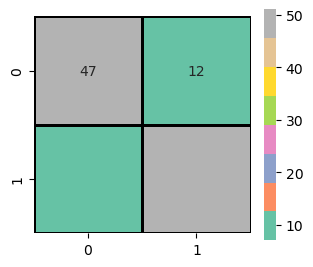

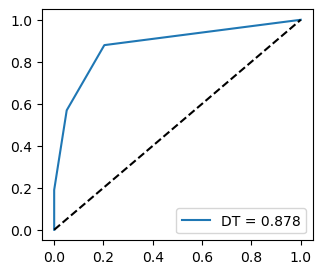

In [54]:
cm = confusion_matrix(ytest, y_pred)
f, ax = plt.subplots(figsize=(3.5,3))
sns.heatmap(cm,cmap="Set2", annot = True, linewidths=1,linecolor="black",fmt=".0f",ax=ax, square=True)
plt.savefig('dtconfusion_matrix.pdf')  # Save confusion matrix plot as PDF
plt.show()

# Compute AUC-ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest, dt.predict_proba(xtest)[:, 1])
auc_roc = roc_auc_score(ytest, dt.predict_proba(xtest)[:, 1])  # Compute AUC-ROC score
plt.figure(figsize=(3.5, 3))
plt.plot(fpr, tpr, label='DT = {:.3f}'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.legend(loc='lower right')
plt.savefig('dtauc_roc_curve.pdf')  # Save AUC-ROC curve plot as PDF
plt.show()

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
t = ExtraTreesClassifier(n_estimators = 10)
t.fit(xtrain,ytrain)
print(dt.score(xtest,ytest))

y_pred = t.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculate Jaccard Score
jaccard = jaccard_score(ytest, y_pred)
print("Jaccard Score:", jaccard)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(ytest, y_pred)
print("Cohen's Kappa Score:", kappa)

# Calculate Hamming Loss
hamming = hamming_loss(ytest, y_pred)
print("Hamming Loss:", hamming)

0.8376068376068376
Accuracy: 0.9145299145299145
Precision: 0.9285714285714286
Recall: 0.896551724137931
F1 Score: 0.912280701754386
Jaccard Score: 0.8387096774193549
Cohen's Kappa Score: 0.8289973691902952
Hamming Loss: 0.08547008547008547


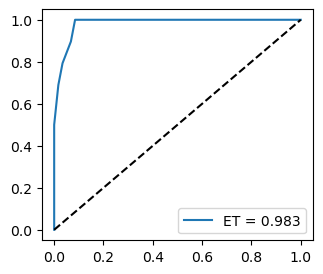

In [64]:
# Compute AUC-ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest, t.predict_proba(xtest)[:, 1])
auc_roc = roc_auc_score(ytest, t.predict_proba(xtest)[:, 1])  # Compute AUC-ROC score
plt.figure(figsize=(3.5, 3))
plt.plot(fpr, tpr, label='ET = {:.3f}'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.legend(loc='lower right')
plt.savefig('ET.pdf')  # Save AUC-ROC curve plot as PDF
plt.show()

In [92]:
y_pred = sehm.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculate Jaccard Score
jaccard = jaccard_score(ytest, y_pred)
print("Jaccard Score:", jaccard)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(ytest, y_pred)
print("Cohen's Kappa Score:", kappa)

# Calculate Hamming Loss
hamming = hamming_loss(ytest, y_pred)
print("Hamming Loss:", hamming)

0.9316239316239316
Accuracy: 0.9316239316239316
Precision: 0.9464285714285714
Recall: 0.9137931034482759
F1 Score: 0.9298245614035087
Jaccard Score: 0.8688524590163934
Cohen's Kappa Score: 0.8631978953522361
Hamming Loss: 0.06837606837606838


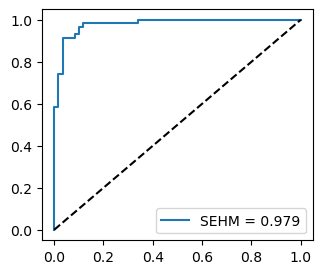

In [85]:
# Compute AUC-ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest, sehm.predict_proba(xtest)[:, 1])
auc_roc = roc_auc_score(ytest, sehm.predict_proba(xtest)[:, 1])  # Compute AUC-ROC score
plt.figure(figsize=(3.5, 3))
plt.plot(fpr, tpr, label='SEHM = {:.3f}'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.legend(loc='lower right')
plt.savefig('gb.pdf')  # Save AUC-ROC curve plot as PDF
plt.show()

In [73]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42, probability=True)  # Linear kernel
svm.fit(xtrain,ytrain)

y_pred = svm.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculate Jaccard Score
jaccard = jaccard_score(ytest, y_pred)
print("Jaccard Score:", jaccard)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(ytest, y_pred)
print("Cohen's Kappa Score:", kappa)

# Calculate Hamming Loss
hamming = hamming_loss(ytest, y_pred)
print("Hamming Loss:", hamming)

Accuracy: 0.8205128205128205
Precision: 0.8032786885245902
Recall: 0.8448275862068966
F1 Score: 0.823529411764706
Jaccard Score: 0.7
Cohen's Kappa Score: 0.6411567109683073
Hamming Loss: 0.1794871794871795


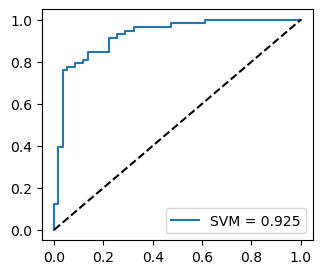

In [74]:
# Compute AUC-ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest, svm.predict_proba(xtest)[:, 1])
auc_roc = roc_auc_score(ytest, svm.predict_proba(xtest)[:, 1])  # Compute AUC-ROC score
plt.figure(figsize=(3.5, 3))
plt.plot(fpr, tpr, label='SVM = {:.3f}'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.legend(loc='lower right')
plt.savefig('svm.pdf')  # Save AUC-ROC curve plot as PDF
plt.show()

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # Specify the number of neighbors (K)

knn.fit(xtrain, ytrain)

y_pred = knn.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculate Jaccard Score
jaccard = jaccard_score(ytest, y_pred)
print("Jaccard Score:", jaccard)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(ytest, y_pred)
print("Cohen's Kappa Score:", kappa)

# Calculate Hamming Loss
hamming = hamming_loss(ytest, y_pred)
print("Hamming Loss:", hamming)

Accuracy: 0.8547008547008547
Precision: 0.8867924528301887
Recall: 0.8103448275862069
F1 Score: 0.8468468468468469
Jaccard Score: 0.734375
Cohen's Kappa Score: 0.70916800701857
Hamming Loss: 0.1452991452991453


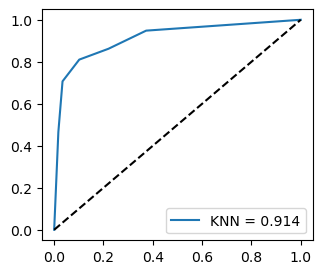

In [76]:
# Compute AUC-ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest, knn.predict_proba(xtest)[:, 1])
auc_roc = roc_auc_score(ytest, knn.predict_proba(xtest)[:, 1])  # Compute AUC-ROC score
plt.figure(figsize=(3.5, 3))
plt.plot(fpr, tpr, label='KNN = {:.3f}'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.legend(loc='lower right')
plt.savefig('knn.pdf')  # Save AUC-ROC curve plot as PDF
plt.show()

In [81]:
rf = RandomForestClassifier(max_depth=3)
rf.fit(xtrain,ytrain)
print(rf.score(xtest,ytest))

y_pred = rf.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculate Jaccard Score
jaccard = jaccard_score(ytest, y_pred)
print("Jaccard Score:", jaccard)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(ytest, y_pred)
print("Cohen's Kappa Score:", kappa)

# Calculate Hamming Loss
hamming = hamming_loss(ytest, y_pred)
print("Hamming Loss:", hamming)

0.8717948717948718
Accuracy: 0.8717948717948718
Precision: 0.8307692307692308
Recall: 0.9310344827586207
F1 Score: 0.8780487804878049
Jaccard Score: 0.782608695652174
Cohen's Kappa Score: 0.7438330170777989
Hamming Loss: 0.1282051282051282


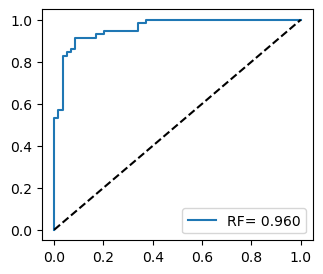

In [82]:
# Compute AUC-ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest, rf.predict_proba(xtest)[:, 1])
auc_roc = roc_auc_score(ytest, rf.predict_proba(xtest)[:, 1])  # Compute AUC-ROC score
plt.figure(figsize=(3.5, 3))
plt.plot(fpr, tpr, label='RF= {:.3f}'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.legend(loc='lower right')
plt.savefig('rf.pdf')  # Save AUC-ROC curve plot as PDF
plt.show()

In [52]:
# Applying NSGA-II on all features
problem_all = FeatureSelectionProblem(xtrain, ytrain, xtest, ytest, n_features=xtrain.shape[1])
algorithm = NSGA2(pop_size=100, n_offsprings=10, eliminate_duplicates=True)
res_all = minimize(problem_all, algorithm, ('n_gen', 100), verbose=False)
pareto_front_all = res_all.F

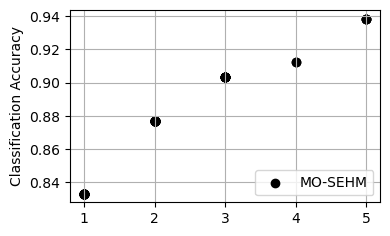

In [53]:
# Plotting the Pareto fronts
plt.figure(figsize=(4, 2.5))
plt.scatter(pareto_front_all[:, 0], -pareto_front_all[:, 1], label='MO-SEHM', color='black')
plt.legend(loc='lower right')
plt.ylabel("Classification Accuracy")
plt.grid(True)
plt.savefig("MO-SEHM1.pdf")
plt.show()

In [113]:
# Accuracies with All Features
accuracies_all_features = -pareto_front_all[:, 1]
numbers_all_features = pareto_front_all[:, 0]
print("Accuracies and numbers with All Features:")
print(accuracies_all_features)
print(numbers_all_features)

Accuracies and numbers with All Features:
[0.8034188  0.8034188  0.94871795 0.94871795 0.88034188 0.86324786
 0.91452991 0.94017094 0.86324786 0.92307692 0.91452991 0.93162393
 0.92307692 0.93162393 0.94017094 0.8034188  0.8034188  0.8034188
 0.86324786 0.86324786 0.86324786 0.86324786 0.86324786 0.86324786
 0.86324786 0.86324786 0.86324786 0.92307692 0.86324786 0.86324786
 0.8034188  0.86324786 0.86324786 0.86324786 0.86324786 0.86324786
 0.86324786 0.86324786 0.8034188  0.86324786 0.86324786 0.86324786
 0.86324786 0.93162393 0.86324786 0.86324786 0.86324786 0.86324786
 0.86324786 0.86324786 0.86324786 0.86324786 0.86324786 0.93162393
 0.8034188  0.86324786 0.8034188  0.86324786 0.86324786 0.86324786
 0.86324786 0.8034188  0.86324786 0.86324786 0.86324786 0.8034188
 0.93162393 0.86324786 0.92307692 0.86324786 0.8034188  0.8034188
 0.8034188  0.86324786 0.86324786 0.86324786 0.86324786 0.8034188
 0.86324786 0.86324786 0.8034188  0.8034188  0.93162393 0.86324786
 0.86324786 0.86324786 0

In [114]:
optimal_solution_index_all = np.argmin(pareto_front_all[:, 1])

optimal_solution_all = pareto_front_all[optimal_solution_index_all, :]

# Print the optimal solutions
print("\nOptimal Solution with All Features:")
print("Accuracy:", -optimal_solution_all[1])
print("Number of Features:", optimal_solution_all[0])


Optimal Solution with All Features:
Accuracy: 0.9487179487179487
Number of Features: 9.0


In [115]:
# Selected features with high accuracy
selected_indices = np.argmax(accuracies_all_features)
selected_features = np.where(res_all.X[selected_indices] >= 0.5)[0]
selected_features_names = xtrain.columns[selected_features]  # Assuming xtrain is a DataFrame
print("Selected features:")
print(selected_features_names)

Selected features:
Index(['diabetes', 'ejection_fraction', 'high_blood_pressure',
       'serum_creatinine', 'serum_sodium', 'sex', 'time',
       'creatinine_phosphokinase', 'platelets'],
      dtype='object')


In [118]:
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculate Jaccard Score
jaccard = jaccard_score(ytest, y_pred)
print("Jaccard Score:", jaccard)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(ytest, y_pred)
print("Cohen's Kappa Score:", kappa)

# Calculate Hamming Loss
hamming = hamming_loss(ytest, y_pred)
print("Hamming Loss:", hamming)

Accuracy: 0.9487179487179487
Precision: 0.9482758620689655
Recall: 0.9482758620689655
F1 Score: 0.9482758620689655
Jaccard Score: 0.9016393442622951
Cohen's Kappa Score: 0.8974284044418469
Hamming Loss: 0.05128205128205128


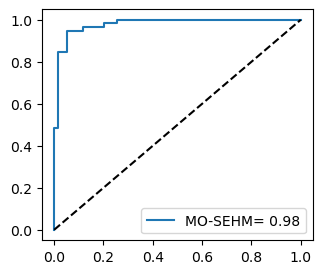

In [120]:
# Compute AUC-ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest, sehm.predict_proba(xtest.iloc[:, selected_features])[:, 1])
auc_roc = roc_auc_score(ytest, sehm.predict_proba(xtest.iloc[:, selected_features])[:, 1])  # Compute AUC-ROC score
plt.figure(figsize=(3.5, 3))
plt.plot(fpr, tpr, label='MO-SEHM= {:.2f}'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.legend(loc='lower right')
plt.savefig('MO-SEHM-AUC.pdf')  # Save AUC-ROC curve plot as PDF
plt.show()

In [121]:
# Define a custom problem for NSGA-II
class FeatureSelectionProblem(ElementwiseProblem):
    def __init__(self, xtrain, ytrain, xtest, ytest, n_features):
        super().__init__(n_var=n_features, n_obj=2, n_constr=0, xl=0, xu=1)
        self.xtrain = xtrain
        self.ytrain = ytrain
        self.xtest = xtest
        self.ytest = ytest

    def _evaluate(self, x, out, *args, **kwargs):
        selected_features = np.where(x >= 0.5)[0]
        if len(selected_features) == 0:
            out["F"] = [1, 0]
            return

        classifier = RandomForestClassifier(max_depth=3)
        classifier.fit(self.xtrain.iloc[:, selected_features], self.ytrain)
        predictions = classifier.predict(self.xtest.iloc[:, selected_features])
        accuracy = accuracy_score(self.ytest, predictions)

        # Normalize objectives to [0, 1]
        num_features = len(selected_features)
        accuracy_normalized = -accuracy  # Negate for minimization

        out["F"] = [num_features, accuracy_normalized]

In [122]:
# Applying NSGA-II on all features
problem_all = FeatureSelectionProblem(xtrain, ytrain, xtest, ytest, n_features=xtrain.shape[1])
algorithm = NSGA2(pop_size=100, n_offsprings=10, eliminate_duplicates=True)
res_all = minimize(problem_all, algorithm, ('n_gen', 100), verbose=False)
pareto_front_all = res_all.F

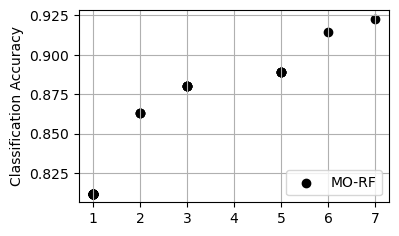

In [126]:
# Plotting the Pareto fronts
plt.figure(figsize=(4, 2.5))
plt.scatter(pareto_front_all[:, 0], -pareto_front_all[:, 1], label='MO-RF', color='black')
plt.legend(loc='lower right')
plt.ylabel("Classification Accuracy")
plt.grid(True)
plt.savefig("MO-RF.pdf")
plt.show()

In [127]:
# Accuracies with All Features
accuracies_all_features = -pareto_front_all[:, 1]
numbers_all_features = pareto_front_all[:, 0]
print("Accuracies and numbers with All Features:")
print(accuracies_all_features)
print(numbers_all_features)

Accuracies and numbers with All Features:
[0.88034188 0.88034188 0.88888889 0.88034188 0.88888889 0.81196581
 0.91452991 0.88888889 0.81196581 0.88888889 0.81196581 0.86324786
 0.81196581 0.81196581 0.92307692 0.81196581 0.81196581 0.88034188
 0.81196581 0.81196581 0.81196581 0.81196581 0.81196581 0.81196581
 0.81196581 0.81196581 0.86324786 0.81196581 0.81196581 0.88034188
 0.81196581 0.81196581 0.88888889 0.81196581 0.81196581 0.81196581
 0.81196581 0.81196581 0.81196581 0.81196581 0.81196581 0.81196581
 0.81196581 0.86324786 0.81196581 0.81196581 0.81196581 0.81196581
 0.81196581 0.81196581 0.81196581 0.81196581]
[3. 3. 5. 3. 5. 1. 6. 5. 1. 5. 1. 2. 1. 1. 7. 1. 1. 3. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 1. 1. 3. 1. 1. 5. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [128]:
optimal_solution_index_all = np.argmin(pareto_front_all[:, 1])

optimal_solution_all = pareto_front_all[optimal_solution_index_all, :]

# Print the optimal solutions
print("\nOptimal Solution with All Features:")
print("Accuracy:", -optimal_solution_all[1])
print("Number of Features:", optimal_solution_all[0])

# Selected features with high accuracy
selected_indices = np.argmax(accuracies_all_features)
selected_features = np.where(res_all.X[selected_indices] >= 0.5)[0]
selected_features_names = xtrain.columns[selected_features]  # Assuming xtrain is a DataFrame
print("Selected features:")
print(selected_features_names)


Optimal Solution with All Features:
Accuracy: 0.9230769230769231
Number of Features: 7.0
Selected features:
Index(['age', 'diabetes', 'ejection_fraction', 'serum_creatinine', 'sex',
       'time', 'creatinine_phosphokinase'],
      dtype='object')


In [134]:
rf = RandomForestClassifier(max_depth=4)
rf.fit(xtrain.iloc[:, selected_features], ytrain)
y_pred = rf.predict(xtest.iloc[:, selected_features])

accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculate Jaccard Score
jaccard = jaccard_score(ytest, y_pred)
print("Jaccard Score:", jaccard)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(ytest, y_pred)
print("Cohen's Kappa Score:", kappa)

# Calculate Hamming Loss
hamming = hamming_loss(ytest, y_pred)
print("Hamming Loss:", hamming)

Accuracy: 0.8888888888888888
Precision: 0.8688524590163934
Recall: 0.9137931034482759
F1 Score: 0.8907563025210085
Jaccard Score: 0.803030303030303
Cohen's Kappa Score: 0.7778589163137141
Hamming Loss: 0.1111111111111111


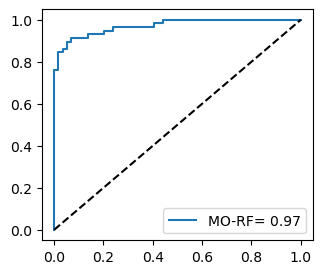

In [136]:
# Compute AUC-ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest, rf.predict_proba(xtest.iloc[:, selected_features])[:, 1])
auc_roc = roc_auc_score(ytest, rf.predict_proba(xtest.iloc[:, selected_features])[:, 1])  # Compute AUC-ROC score
plt.figure(figsize=(3.5, 3))
plt.plot(fpr, tpr, label='MO-RF= {:.2f}'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.legend(loc='lower right')
plt.savefig('MO-RF-AUC.pdf')  # Save AUC-ROC curve plot as PDF
plt.show()

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, jaccard_score, cohen_kappa_score, hamming_loss
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Define a custom problem for NSGA-II
class FeatureSelectionProblem(ElementwiseProblem):
    def __init__(self, xtrain, ytrain, xtest, ytest, n_features):
        super().__init__(n_var=n_features, n_obj=2, n_constr=0, xl=0, xu=1)
        self.xtrain = xtrain
        self.ytrain = ytrain
        self.xtest = xtest
        self.ytest = ytest

    def _evaluate(self, x, out, *args, **kwargs):
        selected_features = np.where(x >= 0.5)[0]
        if len(selected_features) == 0:
            out["F"] = [1, 0]
            return

        classifier = KNeighborsClassifier(n_neighbors=1) 
        classifier.fit(self.xtrain.iloc[:, selected_features], self.ytrain)
        predictions = classifier.predict(self.xtest.iloc[:, selected_features])
        accuracy = accuracy_score(self.ytest, predictions)

        # Normalize objectives to [0, 1]
        num_features = len(selected_features)
        accuracy_normalized = -accuracy  # Negate for minimization

        out["F"] = [num_features, accuracy_normalized]

In [22]:
# Applying NSGA-II on all features
problem_all = FeatureSelectionProblem(xtrain, ytrain, xtest, ytest, n_features=xtrain.shape[1])
algorithm = NSGA2(pop_size=100, n_offsprings=10, eliminate_duplicates=True)
res_all = minimize(problem_all, algorithm, ('n_gen', 100), verbose=False)
pareto_front_all = res_all.F

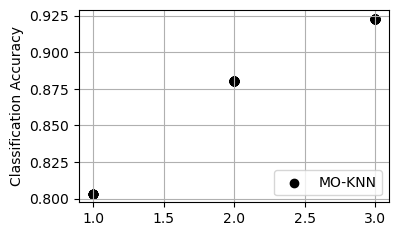

In [24]:
# Plotting the Pareto fronts
plt.figure(figsize=(4, 2.5))
plt.scatter(pareto_front_all[:, 0], -pareto_front_all[:, 1], label='MO-KNN', color='black')
plt.legend(loc='lower right')
plt.ylabel("Classification Accuracy")
plt.grid(True)
plt.savefig("MO-KNN.pdf")
plt.show()

In [25]:
# Accuracies with All Features
accuracies_all_features = -pareto_front_all[:, 1]
numbers_all_features = pareto_front_all[:, 0]
print("Accuracies and numbers with All Features:")
print(accuracies_all_features)
print(numbers_all_features)

Accuracies and numbers with All Features:
[0.92307692 0.8034188  0.8034188  0.92307692 0.88034188 0.88034188
 0.92307692 0.88034188 0.88034188 0.88034188 0.92307692 0.88034188
 0.92307692 0.88034188 0.92307692 0.92307692 0.88034188 0.8034188
 0.92307692 0.92307692 0.92307692 0.88034188 0.8034188  0.92307692
 0.88034188 0.88034188 0.92307692 0.88034188 0.92307692 0.92307692
 0.92307692 0.88034188 0.92307692 0.88034188 0.88034188 0.88034188
 0.92307692 0.92307692 0.92307692 0.88034188 0.92307692 0.88034188
 0.92307692 0.92307692 0.88034188 0.88034188 0.92307692 0.92307692
 0.88034188 0.8034188  0.92307692 0.92307692 0.8034188  0.88034188
 0.92307692 0.92307692 0.88034188 0.88034188 0.88034188 0.88034188
 0.92307692 0.92307692 0.88034188 0.92307692 0.88034188 0.92307692
 0.8034188  0.92307692 0.92307692 0.92307692 0.88034188 0.92307692
 0.92307692 0.88034188 0.92307692 0.88034188 0.88034188 0.92307692
 0.92307692 0.92307692 0.8034188  0.88034188 0.88034188 0.92307692
 0.88034188 0.9230769

In [26]:
optimal_solution_index_all = np.argmin(pareto_front_all[:, 1])

optimal_solution_all = pareto_front_all[optimal_solution_index_all, :]

# Print the optimal solutions
print("\nOptimal Solution with All Features:")
print("Accuracy:", -optimal_solution_all[1])
print("Number of Features:", optimal_solution_all[0])

# Selected features with high accuracy
selected_indices = np.argmax(accuracies_all_features)
selected_features = np.where(res_all.X[selected_indices] >= 0.5)[0]
selected_features_names = xtrain.columns[selected_features]  # Assuming xtrain is a DataFrame
print("Selected features:")
print(selected_features_names)


Optimal Solution with All Features:
Accuracy: 0.9230769230769231
Number of Features: 3.0
Selected features:
Index(['ejection_fraction', 'serum_sodium', 'time'], dtype='object')


In [27]:
rf = KNeighborsClassifier(n_neighbors=1)
rf.fit(xtrain.iloc[:, selected_features], ytrain)
y_pred = rf.predict(xtest.iloc[:, selected_features])

accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculate Jaccard Score
jaccard = jaccard_score(ytest, y_pred)
print("Jaccard Score:", jaccard)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(ytest, y_pred)
print("Cohen's Kappa Score:", kappa)

# Calculate Hamming Loss
hamming = hamming_loss(ytest, y_pred)
print("Hamming Loss:", hamming)

Accuracy: 0.9230769230769231
Precision: 0.9152542372881356
Recall: 0.9310344827586207
F1 Score: 0.923076923076923
Jaccard Score: 0.8571428571428571
Cohen's Kappa Score: 0.8461650840029218
Hamming Loss: 0.07692307692307693


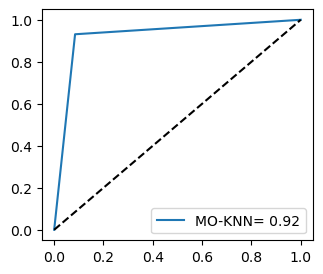

In [28]:
# Compute AUC-ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest, rf.predict_proba(xtest.iloc[:, selected_features])[:, 1])
auc_roc = roc_auc_score(ytest, rf.predict_proba(xtest.iloc[:, selected_features])[:, 1])  # Compute AUC-ROC score
plt.figure(figsize=(3.5, 3))
plt.plot(fpr, tpr, label='MO-KNN= {:.2f}'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.legend(loc='lower right')
plt.savefig('MO-KNN-AUC.pdf')  # Save AUC-ROC curve plot as PDF
plt.show()

In [36]:
class FeatureSelectionProblem(ElementwiseProblem):
    def __init__(self, xtrain, ytrain, xtest, ytest, n_features):
        super().__init__(n_var=n_features, n_obj=2, n_constr=0, xl=0, xu=1)
        self.xtrain = xtrain
        self.ytrain = ytrain
        self.xtest = xtest
        self.ytest = ytest

    def _evaluate(self, x, out, *args, **kwargs):
        selected_features = np.where(x >= 0.5)[0]
        if len(selected_features) == 0:
            out["F"] = [1, 0]
            return

        classifier = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=5)
        classifier.fit(self.xtrain.iloc[:, selected_features], self.ytrain)
        predictions = classifier.predict(self.xtest.iloc[:, selected_features])
        accuracy = accuracy_score(self.ytest, predictions)

        # Normalize objectives to [0, 1]
        num_features = len(selected_features)
        accuracy_normalized = -accuracy  # Negate for minimization

        out["F"] = [num_features, accuracy_normalized]

In [37]:
# Applying NSGA-II on all features
problem_all = FeatureSelectionProblem(xtrain, ytrain, xtest, ytest, n_features=xtrain.shape[1])
algorithm = NSGA2(pop_size=100, n_offsprings=10, eliminate_duplicates=True)
res_all = minimize(problem_all, algorithm, ('n_gen', 100), verbose=False)
pareto_front_all = res_all.F

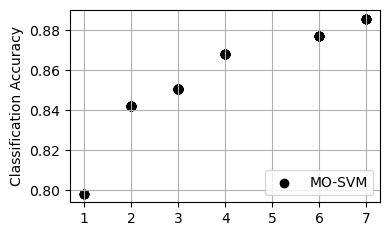

In [38]:
# Plotting the Pareto fronts
plt.figure(figsize=(4, 2.5))
plt.scatter(pareto_front_all[:, 0], -pareto_front_all[:, 1], label='MO-SVM', color='black')
plt.legend(loc='lower right')
plt.ylabel("Classification Accuracy")
plt.grid(True)
plt.savefig("MO-SVM.pdf")
plt.show()

In [39]:
# Accuracies with All Features
accuracies_all_features = -pareto_front_all[:, 1]
numbers_all_features = pareto_front_all[:, 0]
print("Accuracies and numbers with All Features:")
print(accuracies_all_features)
print(numbers_all_features)

Accuracies and numbers with All Features:
[0.88596491 0.79824561 0.79824561 0.88596491 0.84210526 0.86842105
 0.87719298 0.85087719 0.85087719 0.84210526 0.86842105 0.87719298
 0.85087719 0.87719298 0.84210526 0.84210526 0.86842105 0.85087719
 0.86842105 0.88596491 0.85087719 0.86842105 0.79824561 0.85087719
 0.85087719 0.86842105 0.85087719 0.86842105 0.84210526 0.84210526
 0.87719298 0.86842105 0.85087719 0.85087719 0.84210526 0.84210526
 0.85087719 0.85087719 0.79824561 0.85087719 0.84210526 0.86842105
 0.86842105 0.87719298 0.86842105 0.84210526 0.87719298 0.84210526
 0.87719298 0.85087719 0.85087719 0.86842105 0.85087719 0.85087719
 0.85087719 0.84210526 0.85087719 0.86842105 0.85087719 0.85087719
 0.86842105 0.87719298 0.84210526 0.84210526 0.85087719 0.84210526
 0.85087719 0.85087719 0.85087719 0.85087719 0.85087719 0.84210526
 0.84210526 0.85087719 0.88596491 0.84210526 0.88596491 0.86842105
 0.84210526 0.86842105 0.86842105 0.86842105 0.85087719 0.86842105
 0.86842105 0.842105

In [40]:
optimal_solution_index_all = np.argmin(pareto_front_all[:, 1])

optimal_solution_all = pareto_front_all[optimal_solution_index_all, :]

# Print the optimal solutions
print("\nOptimal Solution with All Features:")
print("Accuracy:", -optimal_solution_all[1])
print("Number of Features:", optimal_solution_all[0])

# Selected features with high accuracy
selected_indices = np.argmax(accuracies_all_features)
selected_features = np.where(res_all.X[selected_indices] >= 0.5)[0]
selected_features_names = xtrain.columns[selected_features]  # Assuming xtrain is a DataFrame
print("Selected features:")
print(selected_features_names)


Optimal Solution with All Features:
Accuracy: 0.8859649122807017
Number of Features: 7.0
Selected features:
Index(['anaemia', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'creatinine_phosphokinase'],
      dtype='object')


In [41]:
rf = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=5)
rf.fit(xtrain.iloc[:, selected_features], ytrain)
y_pred = rf.predict(xtest.iloc[:, selected_features])

accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculate Jaccard Score
jaccard = jaccard_score(ytest, y_pred)
print("Jaccard Score:", jaccard)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(ytest, y_pred)
print("Cohen's Kappa Score:", kappa)

# Calculate Hamming Loss
hamming = hamming_loss(ytest, y_pred)
print("Hamming Loss:", hamming)

Accuracy: 0.8859649122807017
Precision: 0.8666666666666667
Recall: 0.9122807017543859
F1 Score: 0.8888888888888888
Jaccard Score: 0.8
Cohen's Kappa Score: 0.7719298245614035
Hamming Loss: 0.11403508771929824


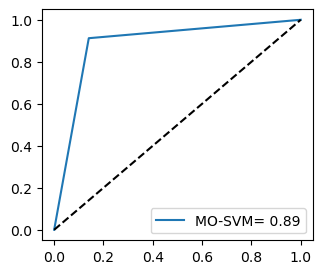

In [42]:
# Compute AUC-ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest, rf.predict_proba(xtest.iloc[:, selected_features])[:, 1])
auc_roc = roc_auc_score(ytest, rf.predict_proba(xtest.iloc[:, selected_features])[:, 1])  # Compute AUC-ROC score
plt.figure(figsize=(3.5, 3))
plt.plot(fpr, tpr, label='MO-SVM= {:.2f}'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.legend(loc='lower right')
plt.savefig('MO-SVM-AUC.pdf')  # Save AUC-ROC curve plot as PDF
plt.show()

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

# Define a custom problem for NSGA-II
class FeatureSelectionProblem(ElementwiseProblem):
    def __init__(self, xtrain, ytrain, xtest, ytest, n_features):
        super().__init__(n_var=n_features, n_obj=2, n_constr=0, xl=0, xu=1)
        self.xtrain = xtrain
        self.ytrain = ytrain
        self.xtest = xtest
        self.ytest = ytest

    def _evaluate(self, x, out, *args, **kwargs):
        selected_features = np.where(x >= 0.5)[0]
        if len(selected_features) == 0:
            out["F"] = [1, 0]
            return

        classifier = ExtraTreesClassifier(n_estimators = 10)
        classifier.fit(self.xtrain.iloc[:, selected_features], self.ytrain)
        predictions = classifier.predict(self.xtest.iloc[:, selected_features])
        accuracy = accuracy_score(self.ytest, predictions)

        # Normalize objectives to [0, 1]
        num_features = len(selected_features)
        accuracy_normalized = -accuracy  # Negate for minimization

        out["F"] = [num_features, accuracy_normalized]

In [13]:
# Applying NSGA-II on all features
problem_all = FeatureSelectionProblem(xtrain, ytrain, xtest, ytest, n_features=xtrain.shape[1])
algorithm = NSGA2(pop_size=100, n_offsprings=10, eliminate_duplicates=True)
res_all = minimize(problem_all, algorithm, ('n_gen', 100), verbose=False)
pareto_front_all = res_all.F

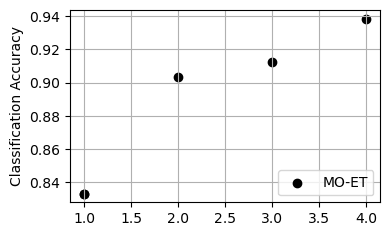

In [14]:
# Plotting the Pareto fronts
plt.figure(figsize=(4, 2.5))
plt.scatter(pareto_front_all[:, 0], -pareto_front_all[:, 1], label='MO-ET', color='black')
plt.legend(loc='lower right')
plt.ylabel("Classification Accuracy")
plt.grid(True)
plt.savefig("MO-ET.pdf")
plt.show()

In [15]:
# Accuracies with All Features
accuracies_all_features = -pareto_front_all[:, 1]
numbers_all_features = pareto_front_all[:, 0]
print("Accuracies and numbers with All Features:")
print(accuracies_all_features)
print(numbers_all_features)

Accuracies and numbers with All Features:
[0.93859649 0.90350877 0.9122807  0.83333333 0.83333333]
[4. 2. 3. 1. 1.]


In [16]:
optimal_solution_index_all = np.argmin(pareto_front_all[:, 1])

optimal_solution_all = pareto_front_all[optimal_solution_index_all, :]

# Print the optimal solutions
print("\nOptimal Solution with All Features:")
print("Accuracy:", -optimal_solution_all[1])
print("Number of Features:", optimal_solution_all[0])

# Selected features with high accuracy
selected_indices = np.argmax(accuracies_all_features)
selected_features = np.where(res_all.X[selected_indices] >= 0.5)[0]
selected_features_names = xtrain.columns[selected_features]  # Assuming xtrain is a DataFrame
print("Selected features:")
print(selected_features_names)


Optimal Solution with All Features:
Accuracy: 0.9385964912280702
Number of Features: 4.0
Selected features:
Index(['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'], dtype='object')


In [23]:
rf = ExtraTreesClassifier()
rf.fit(xtrain.iloc[:, selected_features], ytrain)
y_pred = rf.predict(xtest.iloc[:, selected_features])

accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculate Jaccard Score
jaccard = jaccard_score(ytest, y_pred)
print("Jaccard Score:", jaccard)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(ytest, y_pred)
print("Cohen's Kappa Score:", kappa)

# Calculate Hamming Loss
hamming = hamming_loss(ytest, y_pred)
print("Hamming Loss:", hamming)

Accuracy: 0.9035087719298246
Precision: 0.9423076923076923
Recall: 0.8596491228070176
F1 Score: 0.8990825688073394
Jaccard Score: 0.8166666666666667
Cohen's Kappa Score: 0.8070175438596492
Hamming Loss: 0.09649122807017543


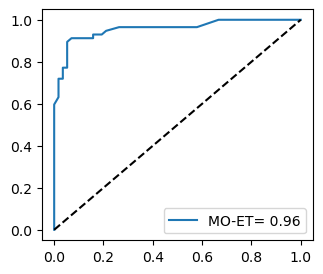

In [24]:
# Compute AUC-ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest, rf.predict_proba(xtest.iloc[:, selected_features])[:, 1])
auc_roc = roc_auc_score(ytest, rf.predict_proba(xtest.iloc[:, selected_features])[:, 1])  # Compute AUC-ROC score
plt.figure(figsize=(3.5, 3))
plt.plot(fpr, tpr, label='MO-ET= {:.2f}'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.legend(loc='lower right')
plt.savefig('MO-ET-AUC.pdf')  # Save AUC-ROC curve plot as PDF
plt.show()

In [28]:

class FeatureSelectionProblem(ElementwiseProblem):
    def __init__(self, xtrain, ytrain, xtest, ytest, n_features):
        super().__init__(n_var=n_features, n_obj=2, n_constr=0, xl=0, xu=1)
        self.xtrain = xtrain
        self.ytrain = ytrain
        self.xtest = xtest
        self.ytest = ytest

    def _evaluate(self, x, out, *args, **kwargs):
        selected_features = np.where(x >= 0.5)[0]
        if len(selected_features) == 0:
            out["F"] = [1, 0]
            return

        classifier = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=5)
        classifier.fit(self.xtrain.iloc[:, selected_features], self.ytrain)
        predictions = classifier.predict(self.xtest.iloc[:, selected_features])
        accuracy = accuracy_score(self.ytest, predictions)

        # Normalize objectives to [0, 1]
        num_features = len(selected_features)
        accuracy_normalized = -accuracy  # Negate for minimization

        out["F"] = [num_features, accuracy_normalized]

In [29]:
# Applying NSGA-II on all features
problem_all = FeatureSelectionProblem(xtrain, ytrain, xtest, ytest, n_features=xtrain.shape[1])
algorithm = NSGA2(pop_size=100, n_offsprings=10, eliminate_duplicates=True)
res_all = minimize(problem_all, algorithm, ('n_gen', 100), verbose=False)
pareto_front_all = res_all.F

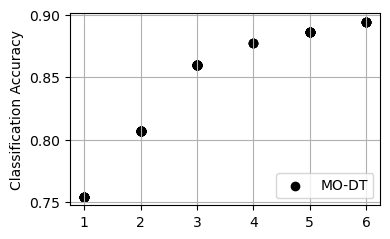

In [30]:
# Plotting the Pareto fronts
plt.figure(figsize=(4, 2.5))
plt.scatter(pareto_front_all[:, 0], -pareto_front_all[:, 1], label='MO-DT', color='black')
plt.legend(loc='lower right')
plt.ylabel("Classification Accuracy")
plt.grid(True)
plt.savefig("MO-DT.pdf")
plt.show()

In [31]:
# Accuracies with All Features
accuracies_all_features = -pareto_front_all[:, 1]
numbers_all_features = pareto_front_all[:, 0]
print("Accuracies and numbers with All Features:")
print(accuracies_all_features)
print(numbers_all_features)

Accuracies and numbers with All Features:
[0.75438596 0.75438596 0.89473684 0.89473684 0.80701754 0.85964912
 0.80701754 0.87719298 0.85964912 0.88596491 0.88596491 0.87719298
 0.80701754 0.88596491 0.88596491 0.88596491 0.75438596 0.88596491
 0.85964912 0.80701754 0.85964912 0.75438596 0.80701754 0.75438596
 0.85964912 0.85964912 0.85964912 0.75438596 0.88596491 0.85964912
 0.80701754 0.88596491 0.85964912 0.85964912 0.75438596 0.80701754
 0.80701754 0.88596491 0.85964912 0.88596491 0.85964912 0.85964912
 0.75438596 0.80701754 0.80701754 0.80701754 0.80701754 0.80701754
 0.85964912 0.89473684 0.85964912 0.88596491 0.85964912 0.85964912
 0.85964912 0.85964912 0.85964912 0.89473684 0.85964912 0.85964912
 0.88596491 0.85964912 0.80701754 0.80701754 0.80701754 0.85964912
 0.89473684 0.80701754 0.80701754 0.85964912 0.80701754 0.80701754
 0.80701754 0.80701754 0.85964912 0.80701754 0.80701754 0.75438596
 0.85964912 0.80701754 0.80701754 0.88596491 0.88596491 0.75438596
 0.87719298 0.859649

In [32]:
optimal_solution_index_all = np.argmin(pareto_front_all[:, 1])

optimal_solution_all = pareto_front_all[optimal_solution_index_all, :]

# Print the optimal solutions
print("\nOptimal Solution with All Features:")
print("Accuracy:", -optimal_solution_all[1])
print("Number of Features:", optimal_solution_all[0])

# Selected features with high accuracy
selected_indices = np.argmax(accuracies_all_features)
selected_features = np.where(res_all.X[selected_indices] >= 0.5)[0]
selected_features_names = xtrain.columns[selected_features]  # Assuming xtrain is a DataFrame
print("Selected features:")
print(selected_features_names)


Optimal Solution with All Features:
Accuracy: 0.8947368421052632
Number of Features: 6.0
Selected features:
Index(['diabetes', 'serum_creatinine', 'sex', 'smoking', 'time',
       'creatinine_phosphokinase'],
      dtype='object')


In [34]:
rf = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=5)
rf.fit(xtrain.iloc[:, selected_features], ytrain)
y_pred = rf.predict(xtest.iloc[:, selected_features])

accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculate Jaccard Score
jaccard = jaccard_score(ytest, y_pred)
print("Jaccard Score:", jaccard)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(ytest, y_pred)
print("Cohen's Kappa Score:", kappa)

# Calculate Hamming Loss
hamming = hamming_loss(ytest, y_pred)
print("Hamming Loss:", hamming)

Accuracy: 0.8947368421052632
Precision: 0.8688524590163934
Recall: 0.9298245614035088
F1 Score: 0.8983050847457625
Jaccard Score: 0.8153846153846154
Cohen's Kappa Score: 0.7894736842105263
Hamming Loss: 0.10526315789473684


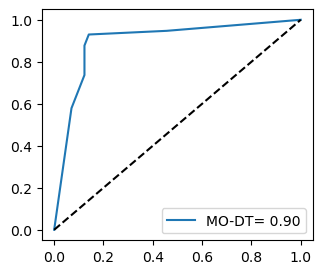

In [35]:
# Compute AUC-ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest, rf.predict_proba(xtest.iloc[:, selected_features])[:, 1])
auc_roc = roc_auc_score(ytest, rf.predict_proba(xtest.iloc[:, selected_features])[:, 1])  # Compute AUC-ROC score
plt.figure(figsize=(3.5, 3))
plt.plot(fpr, tpr, label='MO-DT= {:.2f}'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.legend(loc='lower right')
plt.savefig('MO-DT-AUC.pdf')  # Save AUC-ROC curve plot as PDF
plt.show()